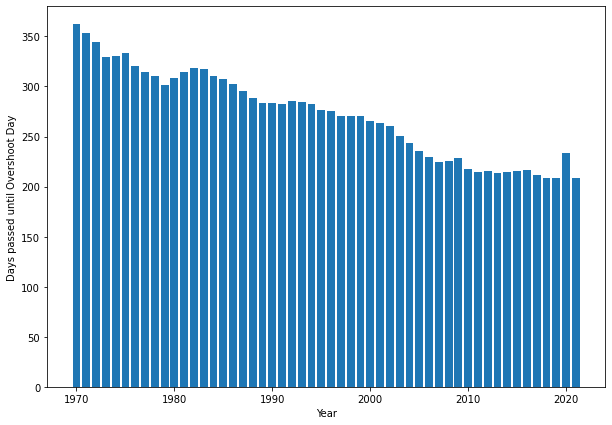

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("../data/overshoot.csv")

year = data['Year']
fullDate = data['DaysPassed']

fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(year, fullDate)
plt.xlabel("Year")
plt.ylabel("Days passed until Overshoot Day")
# Show Plot
plt.show()

Root mean squared error:  1895.6553254437872
R2 score:  0.0


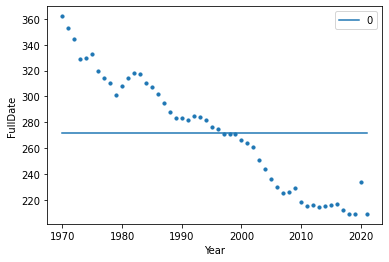

Root mean squared error:  73.41274299252709
R2 score:  0.9612731586764907


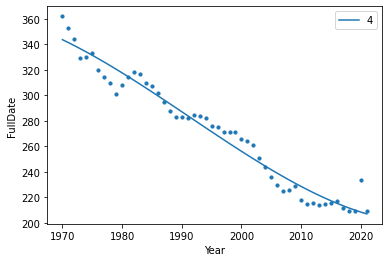

Root mean squared error:  72.99955862941933
R2 score:  0.9614911225423696


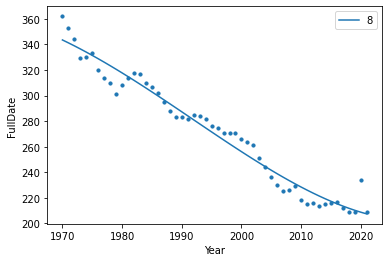

Root mean squared error:  72.57405187561324
R2 score:  0.9617155867411588


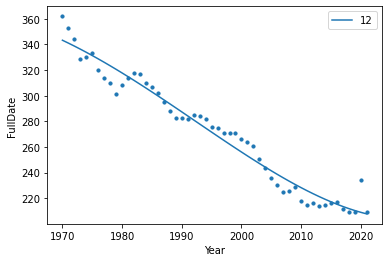

Root mean squared error:  72.13949494833808
R2 score:  0.9619448251060885


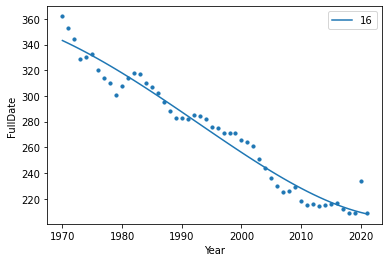

Root mean squared error:  71.69910072826973
R2 score:  0.9621771427717302


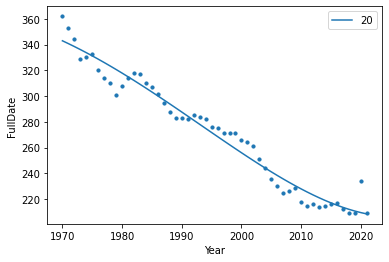

Root mean squared error:  71.2560050519473
R2 score:  0.9624108855151368


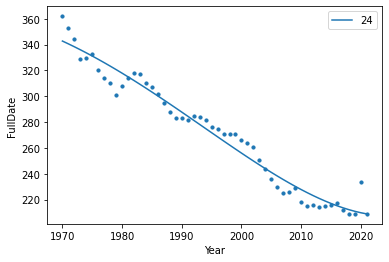

Root mean squared error:  70.81325035796762
R2 score:  0.9626444483828358


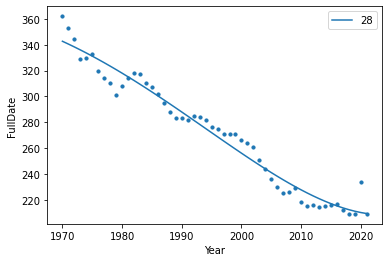

Root mean squared error:  70.37377078684264
R2 score:  0.9628762835509839


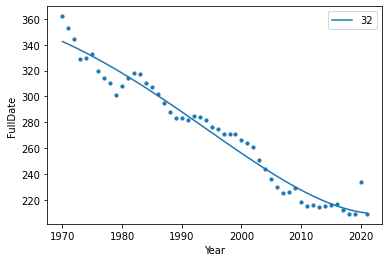

Root mean squared error:  69.94037880362056
R2 score:  0.9631049073822283


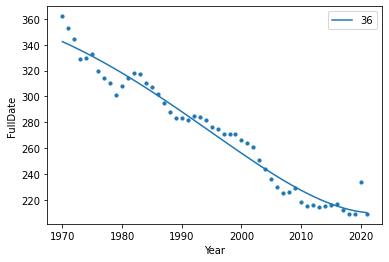

Root mean squared error:  69.5157534128286
R2 score:  0.9633289066425857


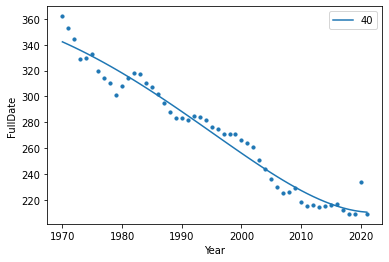

Root mean squared error:  69.10243000594149
R2 score:  0.9635469438571255


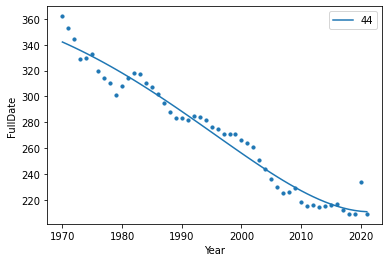

Root mean squared error:  68.70279186787856
R2 score:  0.9637577617904802


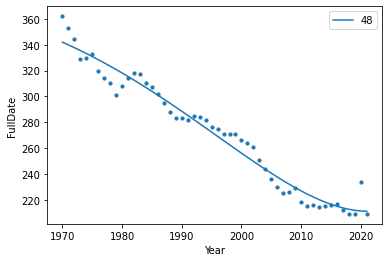

Root mean squared error:  68.31906337584736
R2 score:  0.963960187034606


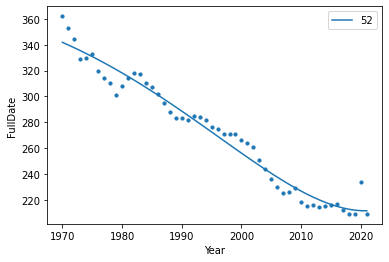

Root mean squared error:  67.95330487874129
R2 score:  0.9641531327100126


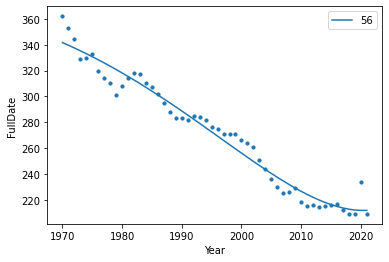

Root mean squared error:  67.6074092536283
R2 score:  0.9643356002822924


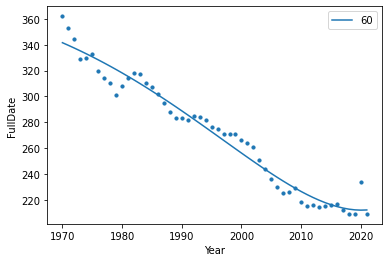

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# sckit-learn implementation
year = np.array(year)
year = year.reshape(-1,1)
fullDate = list(fullDate)

for deg in range(0,62,4):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(year)
    regression_model = LinearRegression()
    regression_model.fit(X_poly, fullDate)
    y_predicted = regression_model.predict(X_poly)

    # model evaluation
    rmse = mean_squared_error(fullDate, y_predicted)
    r2 = r2_score(fullDate, y_predicted)

    # printing values
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

    plt.scatter(year, fullDate, s=10)
    plt.xlabel('Year')
    plt.ylabel('FullDate')
    # predicted values
    plt.plot(year, y_predicted, label = deg)
    plt.legend()
    plt.show()

Root mean squared error:  4977.867233560089
R2 score:  -101.65760432171766


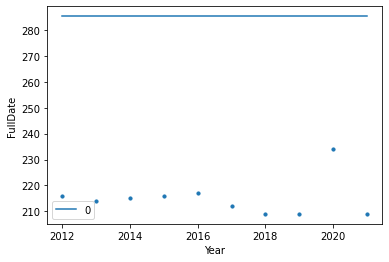

Root mean squared error:  3754.021621053459
R2 score:  -76.41847022176654


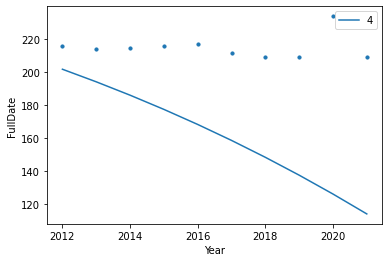

Root mean squared error:  3894.740470814955
R2 score:  -79.32048815869159


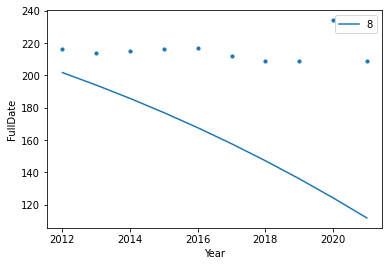

Root mean squared error:  4039.3091436687973
R2 score:  -82.30190026126618


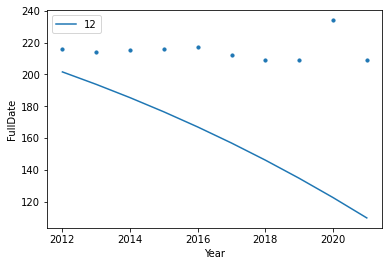

Root mean squared error:  4187.924673335829
R2 score:  -85.36676991824767


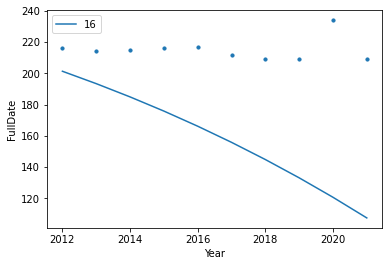

Root mean squared error:  4340.806310203997
R2 score:  -88.51961868847178


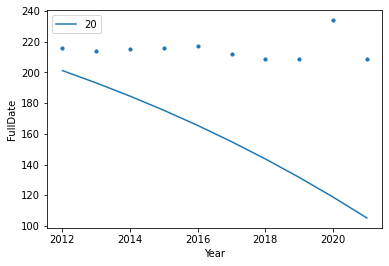

Root mean squared error:  4498.1976079792485
R2 score:  -91.76546933345531


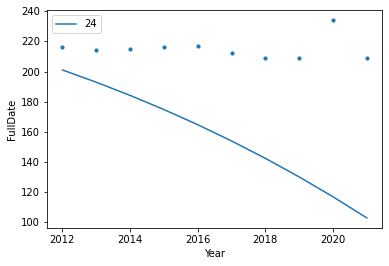

Root mean squared error:  4660.368585617614
R2 score:  -95.10989040250804


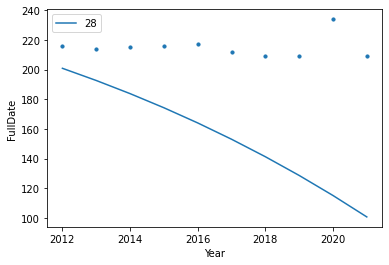

Root mean squared error:  4827.618071125265
R2 score:  -98.55904456847318


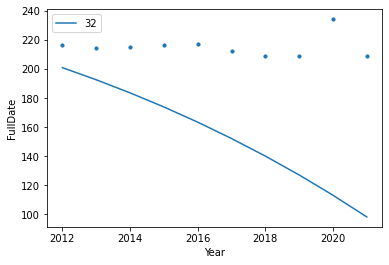

Root mean squared error:  5000.276208979145
R2 score:  -102.11974033778398


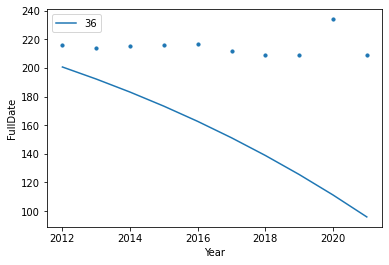

Root mean squared error:  5178.70722471926
R2 score:  -105.79948906412167


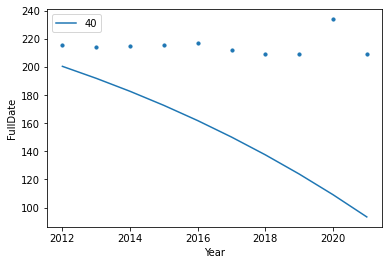

Root mean squared error:  5363.3123164564795
R2 score:  -109.60656457942832


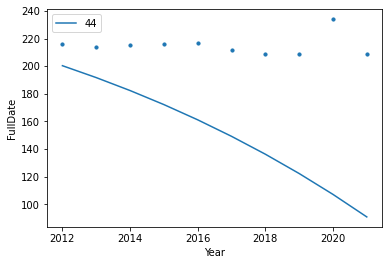

Root mean squared error:  5554.532900188445
R2 score:  -113.55007012143628


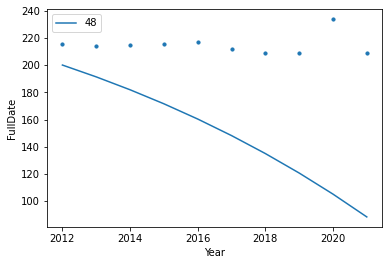

Root mean squared error:  5752.854081123522
R2 score:  -117.64000992211841


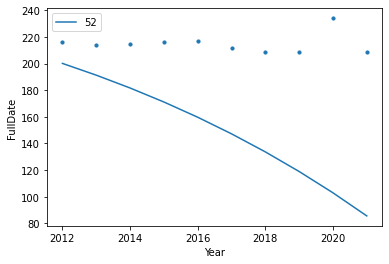

Root mean squared error:  5958.808401723351
R2 score:  -121.8873665028532


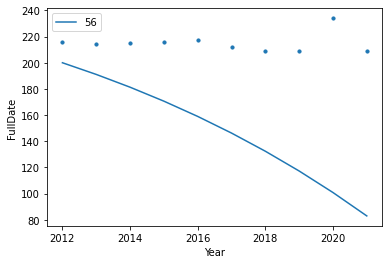

Root mean squared error:  6172.979894506689
R2 score:  -126.3041842546234


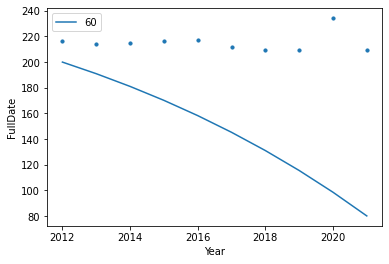

In [37]:
tYear = year[:-10]
tFullDate = fullDate[:-10]

testYear = year[len(year)-10:len(year)]
testFullDate = fullDate[len(fullDate)-10:len(fullDate)]

for deg in range(0,62,4):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(tYear)
    regression_model = LinearRegression()
    regression_model.fit(X_poly, tFullDate)
    y_predicted = regression_model.predict(poly.fit_transform(testYear))

    # model evaluation
    rmse = mean_squared_error(testFullDate, y_predicted)
    r2 = r2_score(testFullDate, y_predicted)

    # printing values
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)

    plt.scatter(testYear, testFullDate, s=10)
    plt.xlabel('Year')
    plt.ylabel('FullDate')
    # predicted values
    plt.plot(testYear, y_predicted, label = deg)
    plt.legend()
    plt.show()

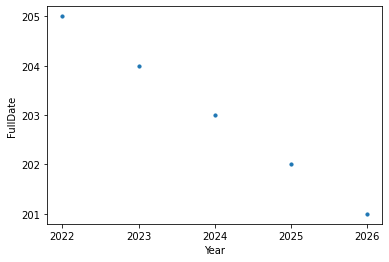

,Year,DaysPassed
0,2022,205.0
1,2023,204.0
2,2024,203.0
3,2025,202.0
4,2026,201.0


In [38]:
poly = PolynomialFeatures(degree = 4)

future = list(range(2022,2027))
future = np.array(future)
future = future.reshape(-1,1)
X_poly = poly.fit_transform(year)
regression_model = LinearRegression()
regression_model.fit(X_poly, fullDate)
y_predicted = regression_model.predict(poly.fit_transform(future))

for i in range(len(y_predicted)):
    y_predicted[i] = int(y_predicted[i])

plt.scatter(future,y_predicted,s = 10)
plt.locator_params(integer=True)
plt.xlabel('Year')
plt.ylabel('FullDate')
plt.show()

future = future.flatten()
nuData = {"Year" : future,"DaysPassed" : y_predicted}
df = pd.DataFrame(nuData)
df

42    216
43    214
44    215
45    216
46    217
47    212
48    209
49    209
50    234
51    209
Name: DaysPassed, dtype: int64
Root mean squared error:  47.4836243865614
R2 score:  0.020754291883658404


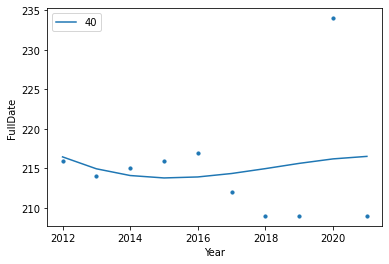

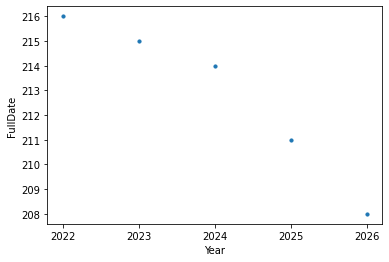

,Year,DaysPassed
0,2022,216.0
1,2023,215.0
2,2024,214.0
3,2025,211.0
4,2026,208.0


In [35]:
tYear = year[-10:]
tFullDate = fullDate[-10:]
print(tFullDate)

future = future.reshape(-1,1)
poly = PolynomialFeatures(degree = 40)
X_poly = poly.fit_transform(tYear)
regression_model = LinearRegression()
regression_model.fit(X_poly, tFullDate)

y_predicted = regression_model.predict(X_poly)

# model evaluation
rmse = mean_squared_error(tFullDate, y_predicted)
r2 = r2_score(tFullDate, y_predicted)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

plt.scatter(tYear, tFullDate, s=10)
plt.xlabel('Year')
plt.ylabel('FullDate')
# predicted values
plt.plot(tYear, y_predicted, label = "40")
plt.legend()
plt.show()

y_predicted = regression_model.predict(poly.fit_transform(future))

for i in range(len(y_predicted)):
    y_predicted[i] = int(y_predicted[i])

plt.scatter(future,y_predicted,s = 10)
plt.locator_params(integer=True)
plt.xlabel('Year')
plt.ylabel('FullDate')
plt.show()

future = future.flatten()
nuData = {"Year" : future,"DaysPassed" : y_predicted}
df = pd.DataFrame(nuData)
df

[[2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]]
[216, 214, 215, 216, 217, 212, 209, 209, 234, 209]
[array([2012]), array([2013]), array([2014]), array([2015]), array([2016]), array([2017]), array([2018]), array([2019]), array([2021])]
[216, 214, 215, 216, 217, 212, 209, 209, 209]
Root mean squared error:  3.0884022295791382
R2 score:  0.68414068106577


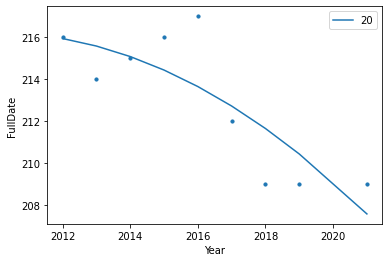

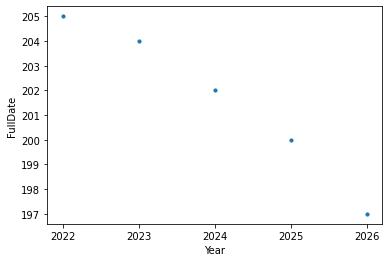

,Year,DaysPassed
0,2022,205.0
1,2023,204.0
2,2024,202.0
3,2025,200.0
4,2026,197.0


In [50]:
tYear = year[-10:]
tFullDate = fullDate[-10:]
print(tYear)
print(tFullDate)

tYear = list(tYear)
tFullDate = list(tFullDate)

tempYear = tYear[len(tYear)-1]
tempDate = tFullDate[len(tFullDate)-1]

tYear.pop()
tYear.pop()
tFullDate.pop()
tFullDate.pop()

tYear.append(tempYear)
tFullDate.append(tempDate)

print(tYear)
print(tFullDate)

future = future.reshape(-1,1)
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(tYear)
regression_model = LinearRegression()
regression_model.fit(X_poly, tFullDate)

y_predicted = regression_model.predict(X_poly)

# model evaluation
rmse = mean_squared_error(tFullDate, y_predicted)
r2 = r2_score(tFullDate, y_predicted)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

plt.scatter(tYear, tFullDate, s=10)
plt.xlabel('Year')
plt.ylabel('FullDate')
# predicted values
plt.plot(tYear, y_predicted, label = "20")
plt.legend()
plt.show()

y_predicted = regression_model.predict(poly.fit_transform(future))

for i in range(len(y_predicted)):
    y_predicted[i] = int(y_predicted[i])

plt.scatter(future,y_predicted,s = 10)
plt.locator_params(integer=True)
plt.xlabel('Year')
plt.ylabel('FullDate')
plt.show()

future = future.flatten()
nuData = {"Year" : future,"DaysPassed" : y_predicted}
df = pd.DataFrame(nuData)
df

In [51]:
print(year)
print(fullDate)

[[1970]
 [1971]
 [1972]
 [1973]
 [1974]
 [1975]
 [1976]
 [1977]
 [1978]
 [1979]
 [1980]
 [1981]
 [1982]
 [1983]
 [1984]
 [1985]
 [1986]
 [1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]]
[362, 353, 344, 329, 330, 333, 320, 314, 310, 301, 308, 314, 318, 317, 310, 307, 302, 295, 288, 283, 283, 282, 285, 284, 282, 276, 275, 271, 271, 271, 266, 264, 261, 251, 244, 236, 230, 225, 226, 229, 218, 215, 216, 214, 215, 216, 217, 212, 209, 209, 234, 209]


[array([1970]), array([1971]), array([1972]), array([1973]), array([1974]), array([1975]), array([1976]), array([1977]), array([1978]), array([1979]), array([1980]), array([1981]), array([1982]), array([1983]), array([1984]), array([1985]), array([1986]), array([1987]), array([1988]), array([1989]), array([1990]), array([1991]), array([1992]), array([1993]), array([1994]), array([1995]), array([1996]), array([1997]), array([1998]), array([1999]), array([2000]), array([2001]), array([2002]), array([2003]), array([2004]), array([2005]), array([2006]), array([2007]), array([2008]), array([2009]), array([2010]), array([2011]), array([2012]), array([2013]), array([2014]), array([2015]), array([2016]), array([2017]), array([2018]), array([2019]), array([2021])]
[362, 353, 344, 329, 330, 333, 320, 314, 310, 301, 308, 314, 318, 317, 310, 307, 302, 295, 288, 283, 283, 282, 285, 284, 282, 276, 275, 271, 271, 271, 266, 264, 261, 251, 244, 236, 230, 225, 226, 229, 218, 215, 216, 214, 215, 216, 217

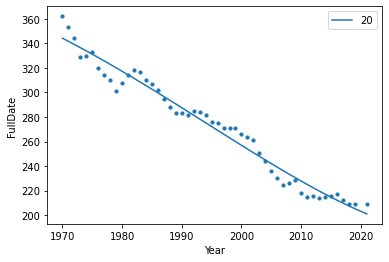

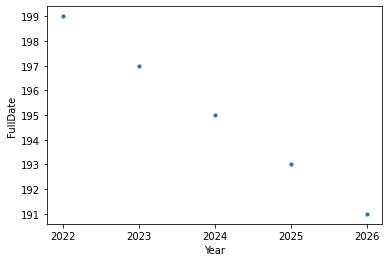

,Year,DaysPassed
0,2022,199.0
1,2023,197.0
2,2024,195.0
3,2025,193.0
4,2026,191.0


In [54]:
tYear = year
tFullDate = fullDate

tYear = list(tYear)
tFullDate = list(tFullDate)

tempYear = tYear[len(tYear)-1]
tempDate = tFullDate[len(tFullDate)-1]

tYear.pop()
tYear.pop()
tFullDate.pop()
tFullDate.pop()

tYear.append(tempYear)
tFullDate.append(tempDate)

print(tYear)
print(tFullDate)

future = future.reshape(-1,1)
poly = PolynomialFeatures(degree = 20)
X_poly = poly.fit_transform(tYear)
regression_model = LinearRegression()
regression_model.fit(X_poly, tFullDate)

y_predicted = regression_model.predict(X_poly)

# model evaluation
rmse = mean_squared_error(tFullDate, y_predicted)
r2 = r2_score(tFullDate, y_predicted)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

plt.scatter(tYear, tFullDate, s=10)
plt.xlabel('Year')
plt.ylabel('FullDate')
# predicted values
plt.plot(tYear, y_predicted, label = "20")
plt.legend()
plt.show()

y_predicted = regression_model.predict(poly.fit_transform(future))

for i in range(len(y_predicted)):
    y_predicted[i] = int(y_predicted[i])

plt.scatter(future,y_predicted,s = 10)
plt.locator_params(integer=True)
plt.xlabel('Year')
plt.ylabel('FullDate')
plt.show()

future = future.flatten()
nuData = {"Year" : future,"DaysPassed" : y_predicted}
df = pd.DataFrame(nuData)
df